IRIS FLOWER CLASSIFICATION

IMPROTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

CHOOSE DATASET FILE FROM LOCAL DIRECTORY

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


LOAD DATASET

In [ ]:
dataset = pd.read_csv('IRIS.csv')

SUMMARIZE DATASET

In [ ]:
print(dataset.shape)
dataset.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset['species'],categories = pd.factorize(dataset['species'])
dataset.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
dataset.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

In [ ]:
dataset.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

VISUALIZE THE DATA

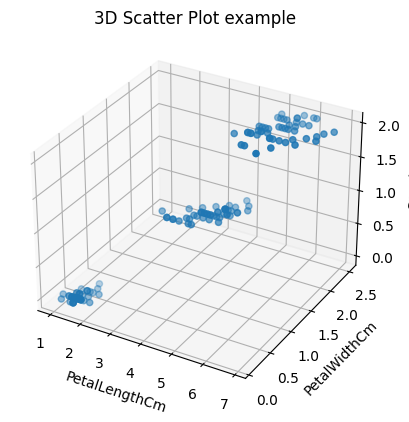

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(dataset.petal_length,dataset.petal_width,dataset.species)
ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('PetalWidthCm')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot example')
plt.show()

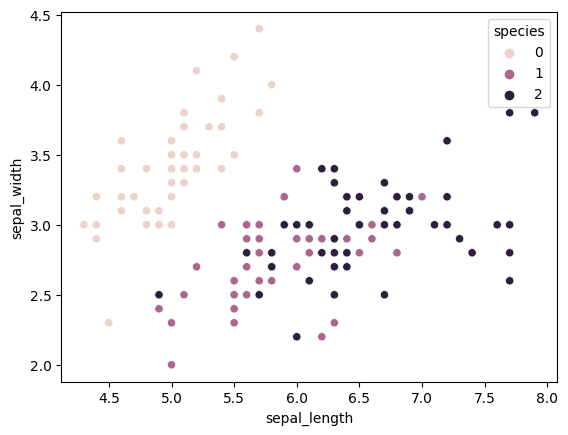

In [ ]:
sns.scatterplot(data=dataset, x = 'sepal_length' , y = 'sepal_width' ,hue = 'species');

APPLYING ELBOW TECHNIQUE

In [ ]:
k_rng = range(1,10)
sse = []

for k in k_rng :
  km = KMeans(n_clusters=k)
  km.fit(dataset[['petal_length' ,'petal_width']])
  sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
sse

[550.6434666666669,
 86.40394533571003,
 31.38775897435897,
 19.499400899685114,
 13.933308757908755,
 11.052733877751727,
 9.261204827285605,
 7.939759126984127,
 6.472894541406307]

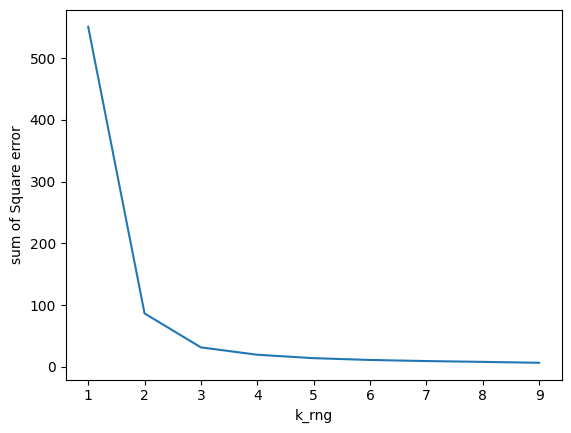

In [ ]:
plt.xlabel('k_rng')
plt.ylabel("sum of Square error")
plt.plot(k_rng,sse)


APPLYING KMEAN ALGORITHM

In [ ]:
km = KMeans(n_clusters = 3,random_state = 0)
y_predict =  km.fit_predict(dataset[['petal_length' ,'petal_width']])
y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
dataset['cluster']=y_predict
dataset.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


ACCURCY MEASURE

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset.species , dataset.cluster)
cm

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 46,  4]])

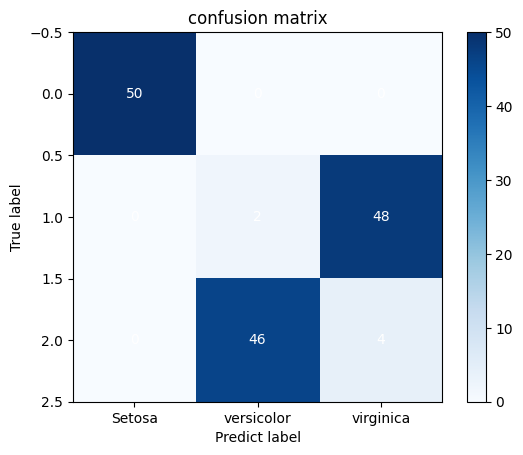

In [ ]:
true_label = dataset.species
predicted_labels = dataset.cluster
cm = confusion_matrix(true_label, predicted_labels)
classes_lables = ['Setosa', 'versicolor', 'virginica']

# plot confussion matrix

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('confusion matrix')
plt.colorbar()
tick_mark = np.arange(len(classes_lables))
plt.xticks(tick_mark, classes_lables)

# fill matrix with values

for i in range(len(classes_lables)):
  for j in range(len(classes_lables)):
    plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white')

plt.xlabel("Predict label")
plt.ylabel("True label")
plt.show()